# KNN Practise Recommendation System

Shah Wali Ullah Baig

# 1:

Begin by importing and visualizing the dataset. Organize the data into a 2D matrix format, utilizing User ID (UID) and Product ID as the basis for recording user interactions.

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is stored in a file named 'dataset.csv'
df = pd.read_csv('Recommendation_sys_database.csv')

# Display the first few rows of the dataset
print("Sample of the dataset:")
df.head()

Sample of the dataset:


,id,product,recommended,shop,uid,api_key,email,order_id,created_at,device,price
0,295,8.270580e+12,True,shopcast-stage-1-0.myshopify.com,kM7u3GN9Qqme,015629919a40414db823561bddb1e8e3,NaN,NaN,18/08/2023 13:45,desktop,2490.0
1,228,8.270580e+12,True,shopcast-stage-1-0.myshopify.com,Ue66GQ3Hp5Ha,015629919a40414db823561bddb1e8e3,NaN,NaN,16/08/2023 12:59,desktop,960000.0
2,279,8.270580e+12,True,shopcast-stage-1-0.myshopify.com,kM7u3GN9Qqme,015629919a40414db823561bddb1e8e3,NaN,NaN,18/08/2023 7:29,desktop,960000.0
3,231,8.270580e+12,True,shopcast-stage-1-0.myshopify.com,Ue66GQ3Hp5Ha,015629919a40414db823561bddb1e8e3,NaN,NaN,16/08/2023 12:52,desktop,1024.0
4,235,8.270580e+12,True,shopcast-stage-1-0.myshopify.com,Ue66GQ3Hp5Ha,015629919a40414db823561bddb1e8e3,NaN,NaN,16/08/2023 12:54,desktop,960000.0


In [113]:
# Create a 2D matrix with User ID (uid) and Product ID (product)
user_product_matrix = df.pivot_table(index='uid', columns='product', values='recommended', aggfunc='count', fill_value=0)

# Display the 2D matrix
print("\nUser-Product Matrix:")
user_product_matrix.head()


User-Product Matrix:


product,2.617300e+12,3.880600e+12,4.408320e+12,4.408330e+12,4.416590e+12,4.418230e+12,4.470760e+12,6.535230e+12,6.537370e+12,6.537380e+12,...,6.888860e+12,6.890550e+12,6.892290e+12,8.038050e+12,8.092530e+12,8.193720e+12,8.219590e+12,8.239100e+12,8.270570e+12,8.270580e+12
uid,,,,,,,,,,,,,,,,,,,,,
#NAME?,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--HmgGZN-V-C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2he5U_l1TLY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3pyOXldrSof,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-4nwgjoDmzkC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
# Checking for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Dropping columns with a large number of missing values
df = df.drop(['order_id', 'api_key'], axis=1)

# Filling missing values for other columns if needed
df = df.fillna(value={'email': 'unknown'})

Missing values in the dataset:
id                0
product           0
recommended       0
shop              0
uid               0
api_key           0
email          5000
order_id       5000
created_at        0
device            0
price          4965
dtype: int64


In [115]:
# Convert 'created_at' to DateTime
df['created_at'] = pd.to_datetime(df['created_at'], format='%d/%m/%Y %H:%M')


In [116]:
# Extracting features from 'created_at'
df['day'] = df['created_at'].dt.day
df['month'] = df['created_at'].dt.month
df['hour'] = df['created_at'].dt.hour

In [117]:
# Drop unnecessary columns
df = df.drop(['id', 'recommended', 'shop', 'email'], axis=1)

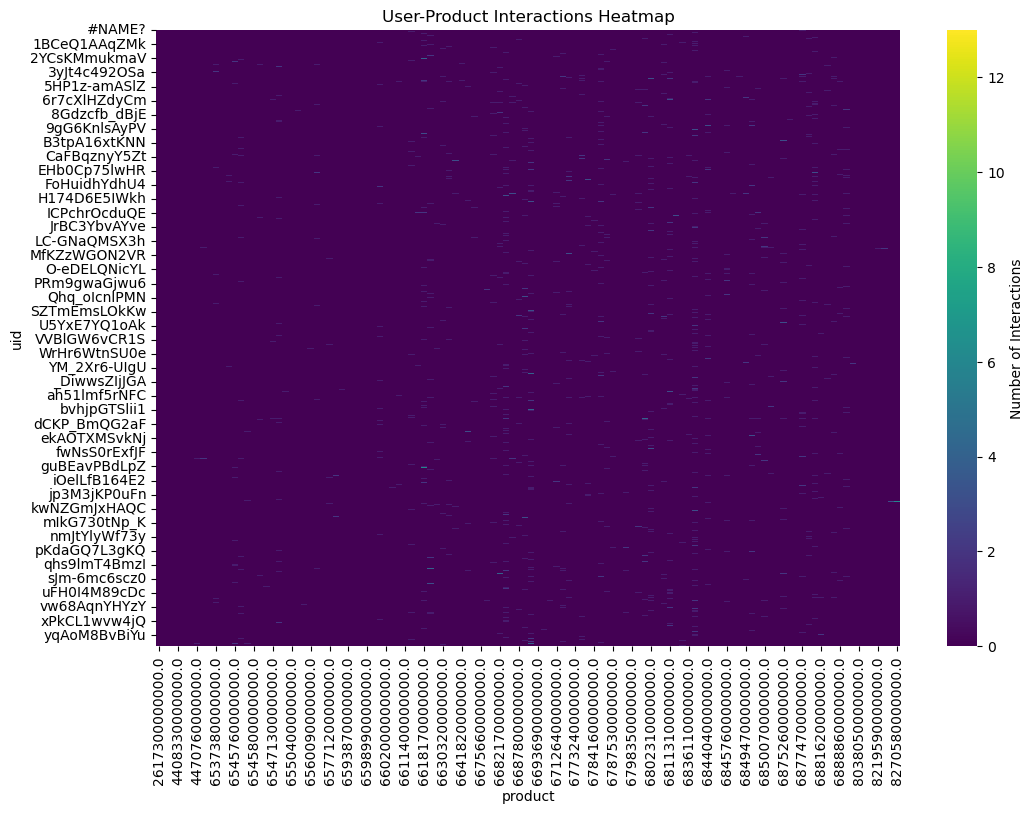

In [118]:
# Visualize the matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(user_product_matrix, cmap='viridis', cbar_kws={'label': 'Number of Interactions'})
plt.title('User-Product Interactions Heatmap')
plt.show()

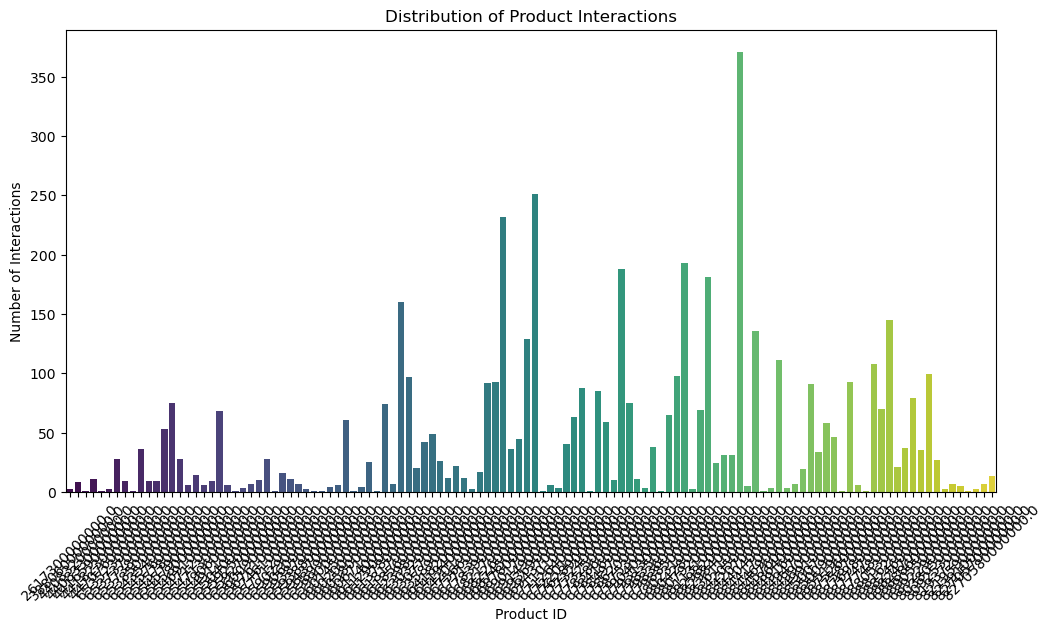

In [119]:
# Visualization 1: Distribution of Product Interactions
plt.figure(figsize=(12, 6))
sns.countplot(x='product', data=df, palette='viridis')
plt.title('Distribution of Product Interactions')
plt.xlabel('Product ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

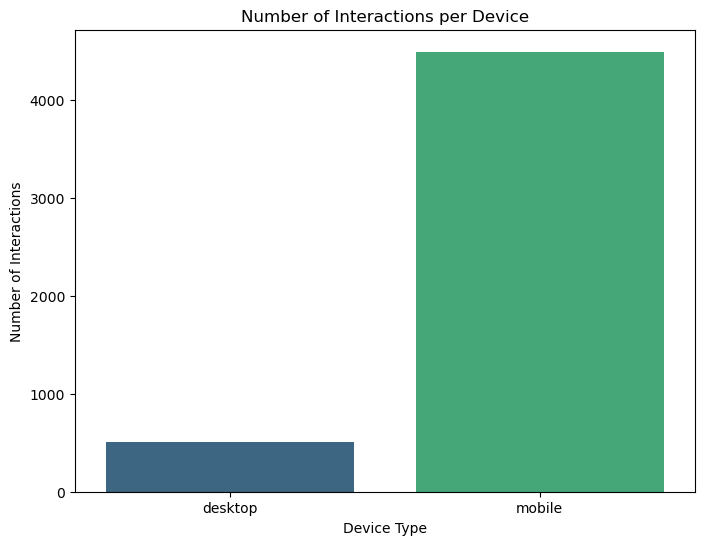

In [120]:
# Visualization 3: Number of Interactions per Device
plt.figure(figsize=(8, 6))
sns.countplot(x='device', data=df, palette='viridis')
plt.title('Number of Interactions per Device')
plt.xlabel('Device Type')
plt.ylabel('Number of Interactions')
plt.show()

# 2

Compute the features for each user. In this context, features represent the count of distinct products purchased by each user.

In [122]:
# Compute the features for each user (count of distinct products purchased)
user_features = user_product_matrix.astype(bool).sum(axis=1)

# Display the user features
print("User Features (Count of Distinct Products Purchased):")
user_features.head()

User Features (Count of Distinct Products Purchased):


uid
#NAME?          23
--HmgGZN-V-C     1
-2he5U_l1TLY     1
-3pyOXldrSof     2
-4nwgjoDmzkC     1
dtype: int64

# 3

Employ a nearest neighbor algorithm to identify the five closest neighbors for each user. These neighbors will be chosen based on similarity in product purchase behavior.

In [123]:
from sklearn.neighbors import NearestNeighbors
user_features_reshaped = user_features.values.reshape(-1, 1)
user_knn = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')
user_knn.fit(user_features_reshaped)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=6)

In [124]:
# Function to get 5 nearest neighbors for each user
def get_user_neighbors(user_id):
    user_idx = user_features.index.get_loc(user_id)
    distances, indices = user_knn.kneighbors([user_features_reshaped[user_idx]], n_neighbors=6)
    return indices[0][1:]

In [125]:
# Display the neighbors for a specific user
user_id = 'kM7u3GN9Qqme'
print(f"Nearest Neighbors for User {user_id}:")
for neighbor_id, distance in user_neighbors[user_id]:
    print(f"Neighbor ID: {user_features.index[neighbor_id]}, Distance: {distance}")

Nearest Neighbors for User kM7u3GN9Qqme:
Neighbor ID: etiBaf6Gua3Z, Distance: 0.0
Neighbor ID: evceyfu73HnR, Distance: 0.0
Neighbor ID: euTj3jWMjCSa, Distance: 0.0
Neighbor ID: ey8X0SfBsiYB, Distance: 0.0
Neighbor ID: erFPO5U5NJZD, Distance: 0.0


# 4

Combine the products purchased by the current user and their five nearest neighbors (including the user itself). This forms a union of products collectively bought by this group.

In [126]:
def print_union_of_products(user_id):
    
    # Include the user itself and its neighbors
    user_and_neighbors = [user_id] + [neighbor[0] for neighbor in user_neighbors[user_id]]
    
    # Filter the original dataframe to include only the relevant users
    relevant_data = df[df['uid'].isin(user_and_neighbors)]
    
    # Get the union of products purchased by the group
    union_of_products = relevant_data['product'].unique()
    
    # Print the rows corresponding to the union of products
    union_rows = relevant_data[relevant_data['product'].isin(union_of_products)]
    print(union_rows)

# Print the union of products for the first 5 users
for user_id in user_features.index[:5]:
    print_union_of_products(user_id)
    print("\n" + "="*80 + "\n")  # Separation line between users


           product     uid          created_at  device  price  day  month  \
83    6.844040e+12  #NAME? 2023-09-20 06:48:00  mobile    NaN   20      9   
188   6.601450e+12  #NAME? 2023-09-20 07:38:00  mobile    NaN   20      9   
193   6.850070e+12  #NAME? 2023-09-20 07:49:00  mobile    NaN   20      9   
196   6.618170e+12  #NAME? 2023-09-20 07:58:00  mobile    NaN   20      9   
240   6.690170e+12  #NAME? 2023-09-20 09:38:00  mobile    NaN   20      9   
244   6.811310e+12  #NAME? 2023-09-20 09:47:00  mobile    NaN   20      9   
285   6.601450e+12  #NAME? 2023-09-20 04:54:00  mobile    NaN   20      9   
286   6.618170e+12  #NAME? 2023-09-20 04:51:00  mobile    NaN   20      9   
451   6.882460e+12  #NAME? 2023-09-20 09:18:00  mobile    NaN   20      9   
771   6.845760e+12  #NAME? 2023-09-20 08:06:00  mobile    NaN   20      9   
797   6.845760e+12  #NAME? 2023-09-20 08:24:00  mobile    NaN   20      9   
881   6.811310e+12  #NAME? 2023-09-20 09:11:00  mobile    NaN   20      9   

# 5

Implement the process of systematically identifying nearest neighbors and aggregating purchased products for each user. This will result in the creation of a recommendation database tailored to individual users.

In [127]:
# Function to create a recommendation database for each user
def create_recommendation_db():
    recommendation_db = {}
    for user_id in user_features.index:
        # Get the 5 nearest neighbors for each user
        neighbor_indices = get_user_neighbors(user_id)
        
        # Extract products purchased by neighbors
        neighbor_products = df[df['uid'].isin(user_features.index[neighbor_indices])]['product'].unique()
        
        # Exclude products already purchased by the user
        user_products = df[df['uid'] == user_id]['product'].unique()
        recommended_products = [product for product in neighbor_products if product not in user_products]
        
        # Store the recommended products in the recommendation database
        recommendation_db[user_id] = recommended_products
    return recommendation_db

# Create the recommendation database
recommendation_db = create_recommendation_db()

In [128]:
# Function to find users with unique recommendations
def find_users_with_unique_recommendations():
    unique_users = []
    for user_id in recommendation_db:
        # Get the list of recommended products for the current user
        user_recommendations = set(recommendation_db[user_id])
        
        # Check if the user's recommendations are different from others
        is_unique = all(user_recommendations != set(recommendation_db[other_user]) for other_user in recommendation_db if other_user != user_id)
        
        if is_unique:
            unique_users.append(user_id)
    return unique_users

# Find users with unique recommendations
unique_users = find_users_with_unique_recommendations()

# Print the list of users with unique recommendations
print("Users with Unique Recommendations:")
print(unique_users)


Users with Unique Recommendations:
['#NAME?', '3yJt4c492OSa', '84yESW_yV4wH', '9QQrlZuBw8Q6', 'CRlhd52Ict3T', 'K_QukmqFgSnd', 'RMTKkTRvd7tX', 'U3rXR3K0LliB', 'axaxh0CgWcXt', 'erFPO5U5NJZD', 'oExRQq8qRECS']


In [129]:
# Example: Get recommendations for a specific user
user_id_to_recommend = '84yESW_yV4wH'
recommendations = recommendation_db.get(user_id_to_recommend, [])

if recommendations:
    print(f"Recommendations for User {user_id_to_recommend}:")
    for product in recommendations:
        print(product)
else:
    print(f"No recommendations found for User {user_id_to_recommend}.")

Recommendations for User 84yESW_yV4wH:
6842050000000.0
6811310000000.0
6641940000000.0
6844040000000.0
6567610000000.0
6678390000000.0


In [130]:
# Example: Get recommendations for a specific user
user_id_to_recommend = 'oExRQq8qRECS'
recommendations = recommendation_db.get(user_id_to_recommend, [])

if recommendations:
    print(f"Recommendations for User {user_id_to_recommend}:")
    for product in recommendations:
        print(product)
else:
    print(f"No recommendations found for User {user_id_to_recommend}.")

Recommendations for User oExRQq8qRECS:
6842050000000.0
6641940000000.0
6784970000000.0
6798360000000.0
6844040000000.0
6678390000000.0
